In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

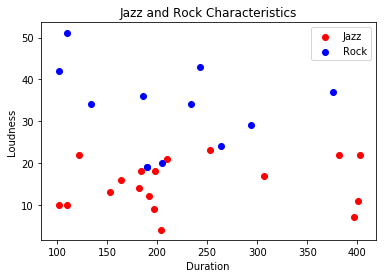

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

# Nearest Neighbor
#### Using the KNeighbors classifier from sklearn with n_neighbors = 1

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
print(neighbors.predict([[24, 190]]))

[0]


Looks like our nearest neighbor model is predicting that a song with 24 loudness and 190s in length is not Jazz based on the nearest neighbor being rock.

# K-Nearest Neighbors
#### Looks at k number of neighbors and gives implicit probabilities in addition to predicted outcome


In [11]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


We see that our prediction has changed - now predicting Jazz.  Using the 5 nearest neighbors it appears that 2/5 have predicted Rock and 3/5 predicted Jazz, thus predicting the song is Jazz.

# Visualizing the decision space using a *Mesh*

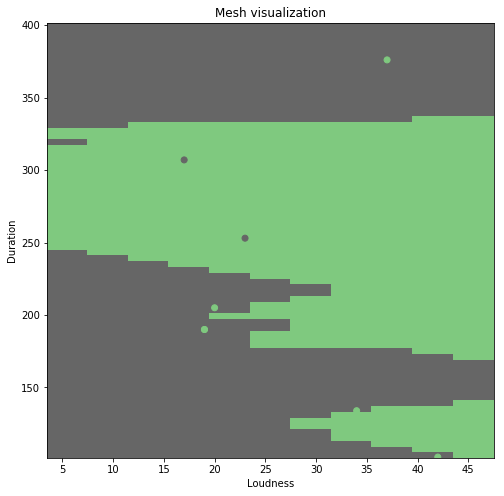

In [20]:
# Create arrays to build the mesh
X = np.array(X)
Y = np.array(Y)

# Create the mesh size
h = 4.0

# Gather the boundary information for the mesh - adding a small shift to ensure all data is in mesh
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5

# Create the meshgrid with padded boundaries and the mesh size above
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for the new space - need to concatenate the two arrays
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted values to fit the meshgrid
Z = Z.reshape(xx.shape)

# Plot the results
plt.figure(figsize=(8, 8))
plt.set_cmap(plt.cm.Accent)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Play around with different mesh sizes

In [23]:
def create_mesh(x, y, size):
    # Create arrays to build the mesh
    X = np.array(x)
    Y = np.array(y)

    # Create the mesh size
    h = size

    # Gather the boundary information for the mesh - adding a small shift to ensure all data is in mesh
    x_min = X[:, 0].min() - 0.5
    x_max = X[:, 0].max() + 0.5
    y_min = X[:, 1].min() - 0.5
    y_max = X[:, 1].max() + 0.5

    # Create the meshgrid with padded boundaries and the mesh size above
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict for the new space - need to concatenate the two arrays
    Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predicted values to fit the meshgrid
    Z = Z.reshape(xx.shape)

    # Plot the results
    plt.figure(figsize=(8, 8))
    plt.set_cmap(plt.cm.Accent)
    plt.pcolormesh(xx, yy, Z)

    # Add the training points to the plot
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.xlabel('Loudness')
    plt.ylabel('Duration')
    plt.title('Mesh visualization')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

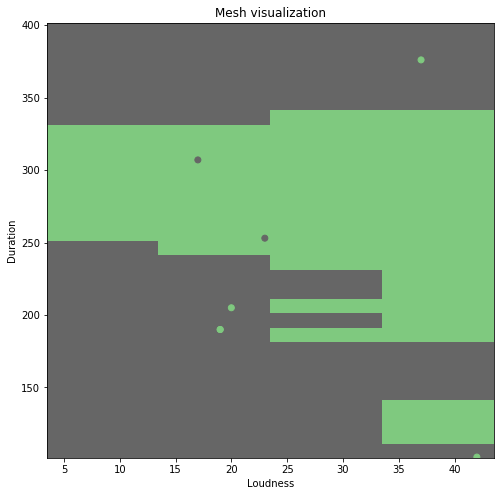

In [24]:
# mesh size = 10
create_mesh(X, Y, 10)

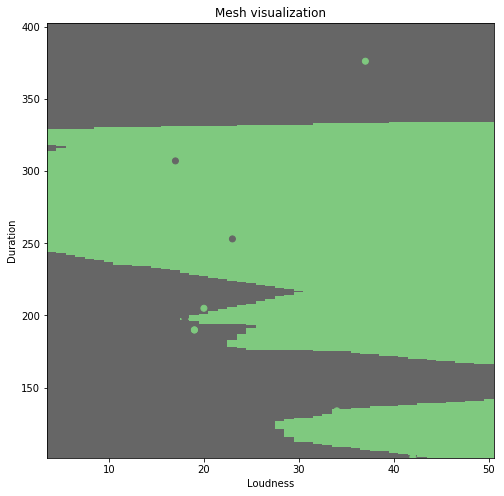

In [37]:
# mesh size = 1
create_mesh(X, Y, 1)

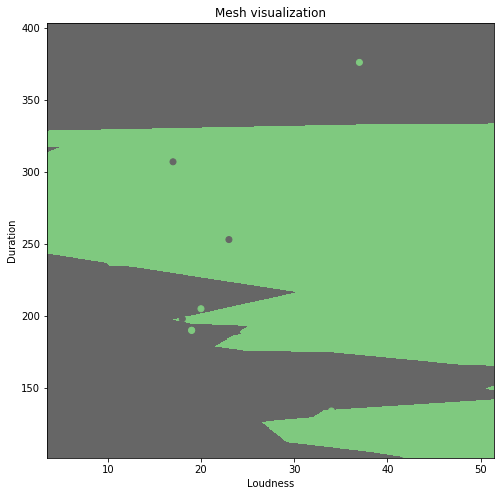

In [38]:
# mesh size = 0.1
create_mesh(X, Y, 0.1)

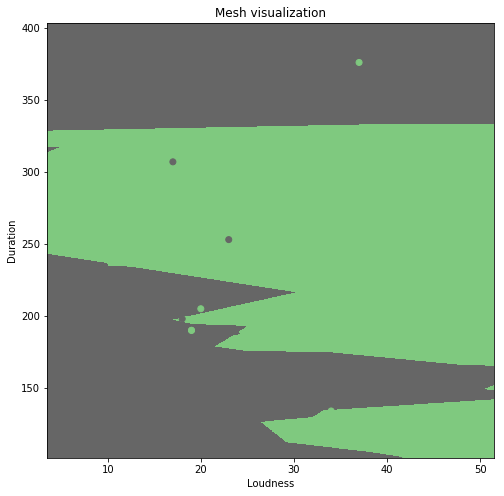

In [36]:
# mesh size = 0.05
#create_mesh(X, Y, 0.05)

Not enough memory to go lower than mesh size = 0.05.  Rendering gets noticeably slow at .1.  Mesh grid looks continuous enough at meshsize = 1.

# Challenge: Build Nearest Neighbor Algorithm

In [193]:
def nearest_neighbor_algorithm(loudness, length):
    '''Find the shortest euclidean distance between point given and nearest point'''

    # Create arrays to calculate distances with
    X = np.array(music[['loudness', 'duration']])
    Y = np.array(music.jazz)
    
    # Calculate the distance between point of interest and all other points
    dist=[]
    for j in range(X.shape[0]):
        dist.append(np.sqrt((loudness - X[j][0])**2+(length - X[j][1])**2))

    # Pair X, Y, and dist
    Z = pd.DataFrame({'Loudness':X[:,0], 'Duration':X[:,1], 'Jazz=1':Y, 'Distance':dist})
    Z = Z.sort_values(by='Distance')
    return Z.iloc[0,:]

In [194]:
print(nearest_neighbor_algorithm(24, 190))

Loudness     19.0
Duration    190.0
Jazz=1        0.0
Distance      5.0
Name: 16, dtype: float64


In [191]:
def k_neighbor_algorithm(loudness, length, k):
    '''Find the shortest euclidean distance between point given and nearest point'''

    # Create arrays to calculate distances with
    X = np.array(music[['loudness', 'duration']])
    Y = np.array(music.jazz)
    
    # Calculate the distance between point of interest and all other points
    dist=[]
    for j in range(X.shape[0]):
        dist.append(np.sqrt((loudness - X[j][0])**2+(length - X[j][1])**2))

    # Pair X, Y, and dist
    Z = pd.DataFrame({'Loudness':X[:,0], 'Duration':X[:,1], 'Jazz=1':Y, 'Distance':dist})
    Z = Z.sort_values(by='Distance')
    
    # Grab k distances
    kvals = Z.iloc[0:k,:]
    
    # Calculate probabilities
    is_jazz = (kvals['Jazz=1'] == 1).sum()
    prob_jazz = is_jazz/k
    prob_rock = (k-is_jazz)/k
    
    if prob_jazz > prob_rock:
        print('Is Jazz')
    else:
        print('Is rock')
    
    return [prob_jazz, prob_rock]

In [192]:
k_neighbor_algorithm(24, 190, 5)

Is Jazz


[0.6, 0.4]